In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from sklearn.model_selection import train_test_split
from clas import clas

In [2]:
invoice = pd.read_csv("final_invoice_clean.csv")
invoice.head()

,Unnamed: 0,unnamed:_0,area_/_locality,city,cust_type,customer_no.,state,gate_pass_time,invoice_date,invoice_no,invoice_time,job_card_no,jobcard_date,jobcard_time,kms_reading,labour_total,make,misc_total,model,odn_no.,osl_total,order_type,parts_total,pin_code,plant,plant_name1,print_status,regn_no,technician_name,total_amt_wtd_tax.,total_value,user_id
0,0,0,Majiwada,Thane,Retail,67849,Maharashtra,00:00:00,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.14,GENERAL MOTORS,0.00,SPARK,7.005200e+09,500.06,Paid Service,2348.75,400601,BC01,THANE,NO,KA19MA1291,Rupesh,4051.95,4051.95,BC01FS1
1,1,1,Thane,Thane,Retail,84419,Maharashtra,00:00:00,2015-01-03,7005200003,10:07:32,173997,2015-01-02,14:12:18,78584,804.26,TATA MOTORS,197.03,INDICA,7.005200e+09,0.00,SMC Value Package,0.00,400603,BC01,THANE,NO,MH43R3046,Prashant,1001.29,1001.29,BC01SA2
2,2,2,Thane,Thane,Retail,81055,Maharashtra,00:00:00,2015-01-03,7005200004,11:12:57,173889,2015-01-02,11:40:44,33985,180.19,MARUTI SUZUKI,0.00,ZEN,7.005200e+09,0.00,Running Repairs,52.95,400607,BC01,THANE,NO,AP09AX0582,Imran,233.14,233.14,BC01SA2
3,3,3,Thane,Thane,Retail,84419,Maharashtra,00:00:00,2015-01-03,7005200005,11:40:44,174158,2015-01-03,10:12:32,78584,0.00,TATA MOTORS,0.00,INDICA,7.005200e+09,0.00,SMC Redemption,0.00,400603,BC01,THANE,NO,MH43R3046,Prashant,0.00,0.00,BC01SA2
4,4,4,Thane,Thane,Retail,18980,Maharashtra,00:00:00,2015-01-03,7005200006,12:07:17,173860,2015-01-02,10:45:42,50057,1202.97,HYUNDAI,100.00,SANTRO XING,7.005200e+09,499.99,Paid Service,944.16,400603,BC01,THANE,NO,MH04CD9768,Dayanand,2747.12,2747.12,BC01SA2


In [3]:
ltv_cols = ["user_id", "total_value", "parts_total", "invoice_date"]
ltv_df = invoice[ltv_cols]
ltv_df.head()

,user_id,total_value,parts_total,invoice_date
0,BC01FS1,4051.95,2348.75,2015-01-02
1,BC01SA2,1001.29,0.00,2015-01-03
2,BC01SA2,233.14,52.95,2015-01-03
3,BC01SA2,0.00,0.00,2015-01-03
4,BC01SA2,2747.12,944.16,2015-01-03


In [4]:
ltv_df["invoice_date"] = pd.to_datetime(ltv_df["invoice_date"])

#combining year and month for better visualization
ltv_df["invoice_year_month"] = ltv_df["invoice_date"].map(lambda x: 100*x.year + x.month)

total_revenue = ltv_df.groupby(["invoice_year_month"])[['total_value']].sum().reset_index()
total_revenue.sort_values("invoice_year_month", inplace = True)

/home/harshal/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/harshal/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [5]:
total_revenue.head()

,invoice_year_month,total_value
0,201204,8076962.23
1,201205,8722166.95
2,201206,9597329.69
3,201207,10259754.04
4,201208,8917973.68


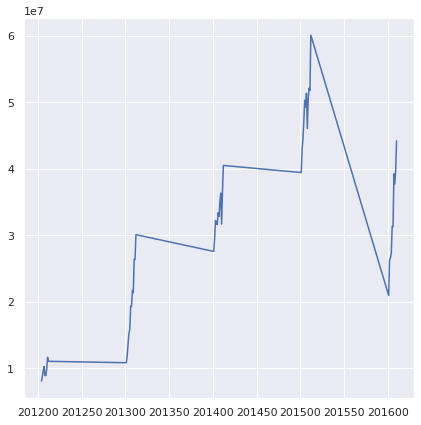

In [6]:
figure = plt.figure(figsize=(7,7))
plt.plot(total_revenue.invoice_year_month, total_revenue.total_value)
plt.show()

In [7]:
total_revenue["monthly_growth"] = total_revenue['total_value'].pct_change()

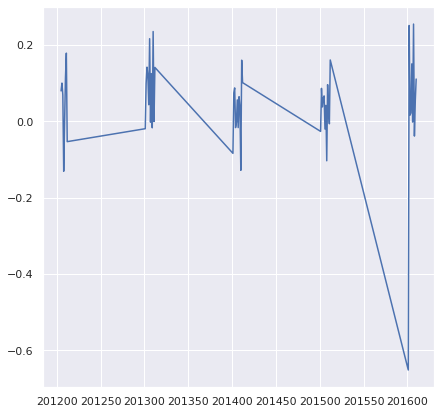

In [8]:
figure = plt.figure(figsize=(7,7))
plt.plot(total_revenue.invoice_year_month, total_revenue.monthly_growth)
plt.show()

In [9]:
#monthly active users 
invoice["invoice_date"] = pd.to_datetime(invoice["invoice_date"])
invoice["invoice_year_month"] = invoice["invoice_date"].map(lambda x: 100*x.year + x.month)
ltv_mau = invoice.groupby("invoice_year_month")["user_id"].nunique()

In [10]:
ltv_mau.head()

invoice_year_month
201204    19
201205    19
201206    17
201207    20
201208    21
Name: user_id, dtype: int64

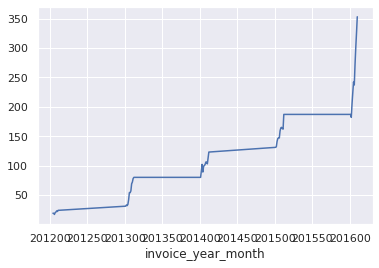

In [11]:
ltv_mau.plot(kind="line")
plt.show()

In [12]:
#average revenue per order 
ltv_monthly_order_avg = ltv_df.groupby(["invoice_year_month"])[["total_value"]].mean()
ltv_monthly_order_avg.rename(columns={"total_value":"avg_revenue"}, inplace=True)
ltv_monthly_order_avg.sort_index(inplace=True)
ltv_monthly_order_avg.head()

,avg_revenue
invoice_year_month,
201204,5275.612169
201205,4867.280664
201206,5075.266891
201207,4771.978623
201208,4639.944683


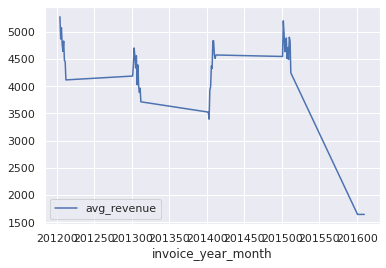

In [13]:
ltv_monthly_order_avg.plot(kind="line")
plt.show()

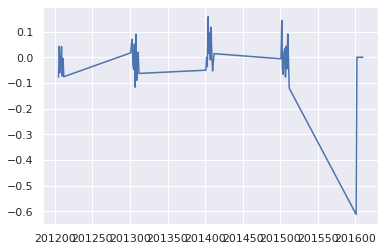

In [14]:
ltv_monthly_order_avg["percent_change"] = ltv_monthly_order_avg.avg_revenue.pct_change()
plt.plot(ltv_monthly_order_avg.index, ltv_monthly_order_avg.percent_change)
plt.show()

### New customer ratio

In [15]:
ltv_min_purchase = invoice.groupby("user_id")[["invoice_date"]].min().reset_index()
ltv_min_purchase.rename(columns={'invoice_date':"min_purchase_date"}, inplace=True)
ltv_min_purchase.min_purchase_date = pd.to_datetime(ltv_min_purchase.min_purchase_date)
ltv_min_purchase["min_purchase_year_month"] =  ltv_min_purchase['min_purchase_date'].map(lambda x: 100*x.year + x.month)
ltv_min_purchase.sort_values("min_purchase_year_month", inplace=True)
ltv_min_purchase.head()

,user_id,min_purchase_date,min_purchase_year_month
15,BC03SA1,2012-04-03,201204
33,BC07SA1,2012-04-03,201204
23,BC04WM1,2012-04-21,201204
22,BC04SA2,2012-04-03,201204
21,BC04SA1,2012-04-04,201204


In [16]:
#merging
invoice = invoice.merge(ltv_min_purchase, on= "user_id")
invoice.head()

,Unnamed: 0,unnamed:_0,area_/_locality,city,cust_type,customer_no.,state,gate_pass_time,invoice_date,invoice_no,invoice_time,job_card_no,jobcard_date,jobcard_time,kms_reading,labour_total,make,misc_total,model,odn_no.,osl_total,order_type,parts_total,pin_code,plant,plant_name1,print_status,regn_no,technician_name,total_amt_wtd_tax.,total_value,user_id,invoice_year_month,min_purchase_date,min_purchase_year_month
0,0,0,Majiwada,Thane,Retail,67849,Maharashtra,00:00:00,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.14,GENERAL MOTORS,0.00,SPARK,7.005200e+09,500.06,Paid Service,2348.75,400601,BC01,THANE,NO,KA19MA1291,Rupesh,4051.95,4051.95,BC01FS1,201501,2013-06-07,201306
1,39,39,Chs Soc Opp Gaury Py,KALAWA,Retail,82212,Maharashtra,00:00:00,2015-01-07,7005200041,17:45:56,173763,2014-12-31,19:07:08,44036,10700.38,MARUTI SUZUKI,0.00,SWIFT,7.005200e+09,2900.10,Accidental,209.17,400605,BC01,THANE,NO,MH04EF9759,Amarnath,13809.65,13809.65,BC01FS1,201501,2013-06-07,201306
2,101,101,Cbd Belapur,Navi Mumbai,Retail,85933,Maharashtra,00:00:00,2015-01-15,7005200103,16:07:27,177046,2015-01-12,16:28:05,37093,175.01,MARUTI SUZUKI,750.05,SWIFT,7.005200e+09,2800.19,Accidental,2100.62,400614,BC01,THANE,NO,MH43AJ9033,Amarnath,5825.87,5825.87,BC01FS1,201501,2013-06-07,201306
3,119,119,Owla Thane,Thane,Retail,29422,Maharashtra,00:00:00,2015-01-17,7005200121,11:30:14,177856,2015-01-15,16:43:53,44567,649.99,HYUNDAI,500.00,ACCENT,7.005200e+09,3399.97,Accidental,4397.08,400601,BC01,THANE,NO,HR36L3235,Rupesh,8947.04,8947.04,BC01FS1,201501,2013-06-07,201306
4,120,120,"Lbs Road,",MULUND-W,Retail,74270,Maharashtra,00:00:00,2015-01-17,7005200122,12:50:23,176808,2015-01-12,10:46:18,12258,1238.04,HYUNDAI,500.01,I20,7.005200e+09,6300.18,Accidental,1265.20,400062,BC01,THANE,NO,MH03BE9938,Amarnath,9303.43,9303.43,BC01FS1,201501,2013-06-07,201306


In [17]:
#adding column for new vs existing customer label
invoice["user_type"] = "New"
invoice.loc[invoice["invoice_year_month"] > invoice["min_purchase_year_month"], "user_type"] = "Existing"
invoice.user_type.value_counts()
#--can combine this with year in dash

Existing    474616
New          17698
Name: user_type, dtype: int64

### Monthly Retention Rate

In [18]:
#identify which users are active every month
ltv_user_purchase = invoice.groupby(["user_id", "invoice_year_month"])[["total_value"]].sum().reset_index()

#creating retention maxtrix with crosstab
#mrr = monthly retention rate
ltv_mrr = pd.crosstab(ltv_user_purchase["user_id"], ltv_user_purchase["invoice_year_month"]).reset_index()
ltv_mrr.head()

invoice_year_month,user_id,201204,201205,201206,201207,201208,201209,201210,201211,201212,201301,201302,201303,201304,201305,201306,201307,201308,201309,201310,201311,201312,201401,201402,201403,201404,201405,201406,201407,201408,201409,201410,201411,201412,201501,201502,201503,201504,201505,201506,201507,201508,201509,201510,201511,201512,201601,201602,201603,201604,201605,201606,201607,201608,201609,201610
0,23108844,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1,23108880,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,23108911,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,23108930,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,23108983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


In [19]:
#creating an array of dictionary which keeps Retained & Total user count for each month
months = ltv_mrr.columns[2:]
retention_array = []
for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data["invoice_year_month"] = int(selected_month)
    retention_data["total_user_count"] = ltv_mrr[selected_month].sum()
    retention_data["retained_user_count"] = ltv_mrr[(ltv_mrr[selected_month]>0) & (ltv_mrr[prev_month]>0)][selected_month].sum()
    retention_array.append(retention_data)

#dataframe of Maharashtra customer retention
ltv_retention = pd.DataFrame(retention_array)
ltv_retention["retention_rate"] =  ltv_retention["retained_user_count"]/ltv_retention["total_user_count"]
ltv_retention.head()

,invoice_year_month,total_user_count,retained_user_count,retention_rate
0,201206,17,16,0.941176
1,201207,20,16,0.800000
2,201208,21,20,0.952381
3,201209,23,18,0.782609
4,201210,22,21,0.954545


## Recency, Frequency and Monetary Value

### Recency

In [20]:
#create a generic user dataframe to keep user_id and new segmentation scores
ltv_user = pd.DataFrame(ltv_df.user_id.unique())
ltv_user.columns = ["user_id"]

#get the max purchase date for each customer and create a dataframe with it
ltv_max_purchase = ltv_df.groupby("user_id").invoice_date.max().reset_index()
ltv_max_purchase.columns = ["user_id", "max_purchase_date"]

#we take our observation point as the max invoice date in our dataset
ltv_max_purchase["recency"] = (ltv_max_purchase["max_purchase_date"].max() - ltv_max_purchase["max_purchase_date"]).dt.days

ltv_user = ltv_user.merge(ltv_max_purchase[["user_id", "recency"]], on = "user_id") 
ltv_user.head()

,user_id,recency
0,BC01FS1,215
1,BC01SA2,163
2,BC01SA1,163
3,BC01WM1,166
4,BC02SA2,591


In [21]:
ltv_user.describe()

,recency
count,557.000000
mean,144.630162
std,272.860526
min,0.000000
25%,2.000000
50%,3.000000
75%,195.000000
max,1439.000000


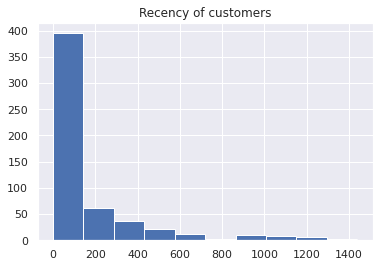

In [22]:
ltv_user.recency.hist()
plt.title("Recency of customers")
plt.show()

### Kmeans clustering on recency

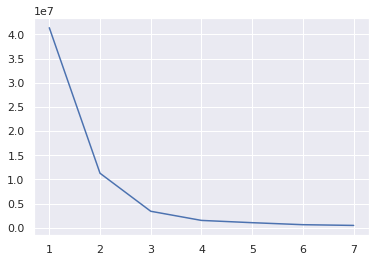

In [23]:
from sklearn.cluster import KMeans

errors = []
ltv_recency = ltv_user[["recency"]]
for k in range(1, 8):
    km_demo = KMeans(n_clusters=k)
    km_demo.fit(ltv_recency)
    errors.append(km_demo.inertia_)

plt.plot(range(1,8), errors)
plt.show()

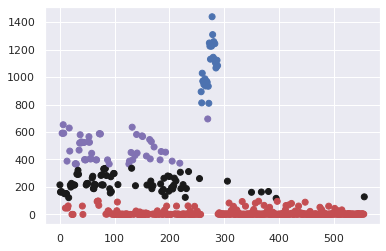

In [24]:
n_clusters = 4

km = KMeans(n_clusters)
ltv_recency["clusters"] = km.fit_predict(ltv_recency)

x = ltv_recency.index
y = ltv_recency.recency
c = {0 : "r", 1 : "b", 2 : "m", 3 : "k"}
label_color = [c[l] for l in ltv_recency.clusters]
plt.scatter(x, y, c = label_color)
plt.show()

### Frequency

In [25]:
ltv_frequency = ltv_df.groupby('user_id')[["invoice_date"]].count().reset_index()
ltv_frequency.columns = ["user_id", "frequency"]

ltv_user = ltv_user.merge(ltv_frequency, on="user_id")
ltv_user.head()

,user_id,recency,frequency
0,BC01FS1,215,1330
1,BC01SA2,163,5472
2,BC01SA1,163,7082
3,BC01WM1,166,548
4,BC02SA2,591,3370


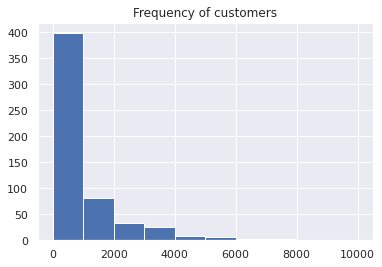

In [26]:
ltv_user.frequency.hist()
plt.title("Frequency of customers")
plt.show()

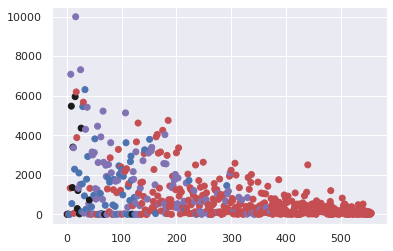

In [27]:
n_clusters = 4

km = KMeans(n_clusters)
ltv_freq = pd.DataFrame(ltv_user.frequency)
ltv_frequency["clusters"] = km.fit_predict(ltv_freq)

x = ltv_frequency.index
y = ltv_frequency.frequency
c = {0 : "r", 1 : "b", 2 : "m", 3 : "k"}
label_color = [c[l] for l in ltv_frequency.clusters]
plt.scatter(x, y, c = label_color)
plt.show()

In [28]:
ltv_user["recency_clusters"] = ltv_recency.clusters

In [29]:
ltv_user["frequency_clusters"] = ltv_frequency.clusters

In [30]:
ltv_user.frequency.describe()

count     557.000000
mean      883.867145
std      1285.651859
min         1.000000
25%        71.000000
50%       366.000000
75%      1202.000000
max      9990.000000
Name: frequency, dtype: float64

### Revenue

In [31]:
ltv_revenue = ltv_df.groupby("user_id").total_value.sum().reset_index()
ltv_user = ltv_user.merge(ltv_revenue, on="user_id")
ltv_user.head()

,user_id,recency,frequency,recency_clusters,frequency_clusters,total_value
0,BC01FS1,215,1330,3,2,10903123.85
1,BC01SA2,163,5472,3,3,21479771.42
2,BC01SA1,163,7082,3,3,26174639.93
3,BC01WM1,166,548,3,0,632781.32
4,BC02SA2,591,3370,2,1,12089215.28


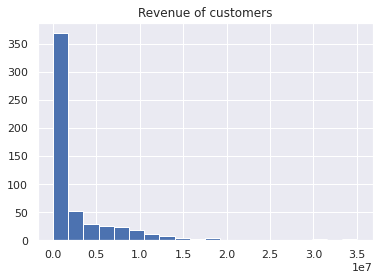

In [32]:
ltv_user.total_value.hist(bins=20)
plt.title("Revenue of customers")
plt.show()

In [33]:
n_clusters = 4

km = KMeans(n_clusters)
ltv_rev = pd.DataFrame(ltv_user.total_value)
ltv_user["revenue_clusters"] = km.fit_predict(ltv_rev)

In [34]:
ltv_user.head()

,user_id,recency,frequency,recency_clusters,frequency_clusters,total_value,revenue_clusters
0,BC01FS1,215,1330,3,2,10903123.85,3
1,BC01SA2,163,5472,3,3,21479771.42,3
2,BC01SA1,163,7082,3,3,26174639.93,2
3,BC01WM1,166,548,3,0,632781.32,1
4,BC02SA2,591,3370,2,1,12089215.28,3


### Overall Score

In [35]:
ltv_user["overall_score"] = ltv_user["recency_clusters"] + ltv_user["frequency_clusters"] + ltv_user["revenue_clusters"]
ltv_user.groupby("overall_score")["recency_clusters", "frequency_clusters", "revenue_clusters"].mean()


/home/harshal/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,recency_clusters,frequency_clusters,revenue_clusters
overall_score,,,
0,0.000000,0.000000,0.000000
1,0.003279,0.059016,0.937705
2,0.700000,0.800000,0.500000
3,0.807692,1.320513,0.871795
4,2.376812,0.666667,0.956522
5,2.055556,2.111111,0.833333
6,1.764706,1.588235,2.647059
7,2.666667,1.666667,2.666667
8,3.000000,2.400000,2.600000


### The scoring above clearly shows us that customers with score 0 is our best customers whereas 0 is the worst.

In [36]:
ltv_user['segment'] = 'low_value'
ltv_user.loc[ltv_user['overall_score']>2,'segment'] = 'mid_value' 
ltv_user.loc[ltv_user['overall_score']>5,'segment'] = 'high_value' 

In [37]:
ltv_user.head()

,user_id,recency,frequency,recency_clusters,frequency_clusters,total_value,revenue_clusters,overall_score,segment
0,BC01FS1,215,1330,3,2,10903123.85,3,8,high_value
1,BC01SA2,163,5472,3,3,21479771.42,3,9,high_value
2,BC01SA1,163,7082,3,3,26174639.93,2,8,high_value
3,BC01WM1,166,548,3,0,632781.32,1,4,mid_value
4,BC02SA2,591,3370,2,1,12089215.28,3,6,high_value


In [38]:
ltv_user.to_csv("ltv_data.csv", index=False)

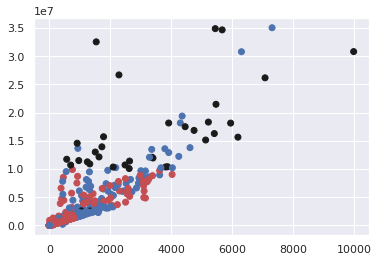

In [39]:
c = {"low_value" : "r", "mid_value" : "b", "high_value" : "k"}
label_color = [c[l] for l in ltv_user.segment]
plt.scatter(ltv_user.frequency, ltv_user.total_value, c = label_color)
plt.show()

 ## Customer Lifetime Value

In [40]:
invoice.columns

Index(['Unnamed: 0', 'unnamed:_0', 'area_/_locality', 'city', 'cust_type', 'customer_no.', 'state', 'gate_pass_time', 'invoice_date', 'invoice_no', 'invoice_time', 'job_card_no', 'jobcard_date', 'jobcard_time', 'kms_reading', 'labour_total', 'make', 'misc_total', 'model', 'odn_no.', 'osl_total', 'order_type', 'parts_total', 'pin_code', 'plant', 'plant_name1', 'print_status', 'regn_no', 'technician_name', 'total_amt_wtd_tax.', 'total_value', 'user_id', 'invoice_year_month', 'min_purchase_date', 'min_purchase_year_month', 'user_type'], dtype='object')

In [41]:
prediction_df = invoice[["city", "cust_type", "state", "kms_reading", "labour_total", "make", "model", "user_id"]]

prediction_df = prediction_df.merge(ltv_user, on = "user_id")
prediction_df.head()

,city,cust_type,state,kms_reading,labour_total,make,model,user_id,recency,frequency,recency_clusters,frequency_clusters,total_value,revenue_clusters,overall_score,segment
0,Thane,Retail,Maharashtra,49317,1203.14,GENERAL MOTORS,SPARK,BC01FS1,215,1330,3,2,10903123.85,3,8,high_value
1,KALAWA,Retail,Maharashtra,44036,10700.38,MARUTI SUZUKI,SWIFT,BC01FS1,215,1330,3,2,10903123.85,3,8,high_value
2,Navi Mumbai,Retail,Maharashtra,37093,175.01,MARUTI SUZUKI,SWIFT,BC01FS1,215,1330,3,2,10903123.85,3,8,high_value
3,Thane,Retail,Maharashtra,44567,649.99,HYUNDAI,ACCENT,BC01FS1,215,1330,3,2,10903123.85,3,8,high_value
4,MULUND-W,Retail,Maharashtra,12258,1238.04,HYUNDAI,I20,BC01FS1,215,1330,3,2,10903123.85,3,8,high_value


In [42]:
#data cleaning 
freq_cols = ["city", "state", "model"]
for col in freq_cols:
    vc = prediction_df[col].value_counts()
    count_dict = {i:j for i, j in zip(vc.index, vc)}
    prediction_df[col] = prediction_df[col].map(count_dict)

make_vc = prediction_df.make.value_counts()
make_other = ["other" if make_vc[x] < 5000 else x for x in prediction_df["make"]]
prediction_df["make"] = make_other

prediction_df.drop(["user_id", "overall_score"], axis = 1, inplace = True)
prediction_df["segment"] = prediction_df["segment"].map({"low_value" : 0,
                                                         "mid_value" : 1,
                                                        "high_value" : 2}) 

#converting to one-hot
prediction_df = pd.get_dummies(prediction_df, drop_first=True)


In [43]:
prediction_df.head()

,city,state,kms_reading,labour_total,model,recency,frequency,recency_clusters,frequency_clusters,total_value,revenue_clusters,segment,cust_type_Corporate- M&M,cust_type_Fleets,cust_type_Franchise,cust_type_Insurance,cust_type_MFCWL,cust_type_Retail,make_FORD,make_GENERAL MOTORS,make_HONDA,make_HYUNDAI,make_MAHINDRA & MAHINDRA,make_MARUTI SUZUKI,make_SKODA,make_TATA MOTORS,make_TOYOTA,make_VOLKSWAGEN,make_other
0,11461,128119,49317,1203.14,7270,215,1330,3,2,10903123.85,3,2,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
1,4,128119,44036,10700.38,31899,215,1330,3,2,10903123.85,3,2,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,71,128119,37093,175.01,31899,215,1330,3,2,10903123.85,3,2,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,11461,128119,44567,649.99,5734,215,1330,3,2,10903123.85,3,2,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
4,4,128119,12258,1238.04,12896,215,1330,3,2,10903123.85,3,2,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


In [44]:
#segments is our target

prediction_df["segment"].value_counts()

1    211860
0    161959
2    118495
Name: segment, dtype: int64

In [45]:
#dropping one category
prediction_df_0 = prediction_df[prediction_df["segment"]!=0]
X = prediction_df_0.drop("segment", axis = 1)
y = prediction_df_0["segment"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
clas(X_train, X_test, y_train, y_test)

/home/harshal/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


 
LogisticRegression
 
              precision    recall  f1-score   support

           1       0.78      0.82      0.80     42456
           2       0.65      0.59      0.61     23615

    accuracy                           0.74     66071
   macro avg       0.71      0.70      0.71     66071
weighted avg       0.73      0.74      0.73     66071

--------------------------------------------------
 
RandomForestClassifier
 
              precision    recall  f1-score   support

           1       0.98      1.00      0.99     42456
           2       1.00      0.97      0.99     23615

    accuracy                           0.99     66071
   macro avg       0.99      0.99      0.99     66071
weighted avg       0.99      0.99      0.99     66071

--------------------------------------------------
 
DecisionTreeClassifier
 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     42456
           2       1.00      0.99      1.00     23615

   

,LogisticRegression,RandomForestClassifier,DecisionTreeClassifier,GradientBoostingClassifier,AdaBoostClassifier,XGBoostClassifier
precision,0.73,0.99,1.0,1.0,1.0,1.0
recall,0.74,0.99,1.0,1.0,1.0,1.0
f1-score,0.73,0.99,1.0,1.0,1.0,1.0


In [46]:
prediction_df_0.shape

(330355, 29)

In [47]:
#cross validation

from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix

X = prediction_df_0.drop("segment", axis = 1)
y = prediction_df_0.segment

dt = DecisionTreeClassifier(max_depth=4)

cv = cross_validate(dt, X, y, cv=3, n_jobs=-1)

In [48]:
cv["test_score"]

array([0.79766434, 0.87507038, 0.83690223])

In [49]:
prediction_df.to_csv("prediction_df.csv", index=False)